In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
# 모델
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
gens = pd.read_csv("c:/Users/grace/Rdata/gens.csv")
p_gens = pd.read_csv("c:/Users/grace/Rdata/pred.csv")
wf = pd.read_csv("c:/Users/grace/Rdata/weather_forecast.csv")

In [3]:
# 발전량 예측량을 모델별로 분리해서 변수로 만들라고 분리하는거
p_gens0 = p_gens.loc[(p_gens["model_id"]==0) & (p_gens["round"]==2)].reset_index()
p_gens1 = p_gens.loc[(p_gens["model_id"]==1) & (p_gens["round"]==2)].reset_index()
p_gens2 = p_gens.loc[(p_gens["model_id"]==2) & (p_gens["round"]==2)].reset_index()
p_gens3 = p_gens.loc[(p_gens["model_id"]==3) & (p_gens["round"]==2)].reset_index()
p_gens4 = p_gens.loc[(p_gens["model_id"]==4) & (p_gens["round"]==2)].reset_index()

In [4]:
# 날씨 예측량을 데이터프레임으로 왜냐면 모델 train 시킬라고
wf_round1 = wf[wf["round"]==1]
wf_round2 = wf[wf["round"]==2]

In [5]:
x_df = pd.DataFrame({"m0": p_gens0["amount"],"m1": p_gens1["amount"],
              "m2": p_gens2["amount"],"m3": p_gens3["amount"],
              "m4": p_gens4["amount"], "time" : p_gens0["time"]})
y_df= gens["amount"]

In [6]:
xy_df = pd.merge(x_df,wf_round2,on="time")
xy_df = pd.merge(xy_df,gens,on="time")

In [7]:
# 'time' 열을 날짜 형식으로 변환
xy_df['time'] = pd.to_datetime(xy_df['time'])

# 월(month) 정보를 추출하여 'month' 열 생성
xy_df['month'] = xy_df['time'].dt.month

In [8]:
# 계절별로 데이터 분할
xy_df1 = xy_df[(xy_df['month'] >= 6) & (xy_df['month'] <= 9)]  # 6월부터 9월까지: 여름
xy_df2 = xy_df[(xy_df['month'] >= 10) & (xy_df['month'] <= 11)]  # 10월부터 11월까지: 가을
xy_df3 = xy_df[(xy_df['month'] >= 12) | (xy_df['month'] <= 2)]  # 12월부터 2월까지: 겨울
xy_df4 = xy_df[(xy_df['month'] >= 3) & (xy_df['month'] <= 5)]  # 3월부터 5월까지: 봄

In [9]:
# 시간대별로 독립 변수(X)와 종속 변수(y) 설정

# 여름 데이터
X1 = xy_df1[['m0', 'm1', 'm2', 'm3', 'm4']]
y1 = xy_df1[['amount']]

# 가을 데이터
X2 = xy_df2[['m0', 'm1', 'm2', 'm3', 'm4']]
y2 = xy_df2[['amount']]

# 겨울 데이터
X3 = xy_df3[['m0', 'm1', 'm2', 'm3', 'm4']]
y3 = xy_df3[['amount']]

# 봄 데이터
X4 = xy_df4[['m0', 'm1', 'm2', 'm3', 'm4']]
y4 = xy_df4[['amount']]

# 데이터셋 리스트
seasonal_datasets = [(X1, y1), (X2, y2), (X3, y3), (X4, y4)]

# 선형 회귀 모델 리스트
seasonal_linear_models = []

# 계절별 회귀 분석 수행
for X, y in seasonal_datasets:
    lr = LinearRegression()
    lr.fit(X, y)
    seasonal_linear_models.append(lr)

# 결과 출력
for i, lr in enumerate(seasonal_linear_models):
    season = ['여름', '가을', '겨울', '봄'][i]
    print(f"{season} - 회귀 계수 (기울기):", lr.coef_)
    print(f"{season} - 절편:", lr.intercept_)


여름 - 회귀 계수 (기울기): [[ 0.69375709  0.14283364  0.10938227 -0.04888753  0.11658289]]
여름 - 절편: [0.25099906]
가을 - 회귀 계수 (기울기): [[ 0.62951579  0.37375954 -0.03560792  0.07312076  0.04010905]]
가을 - 절편: [-0.35033527]
겨울 - 회귀 계수 (기울기): [[ 0.85412137  0.33517265 -0.06400474 -0.09982774 -0.00579211]]
겨울 - 절편: [-1.06886204]
봄 - 회귀 계수 (기울기): [[ 0.86436922  0.01227634 -0.08994772  0.14834716  0.042448  ]]
봄 - 절편: [-0.15396005]


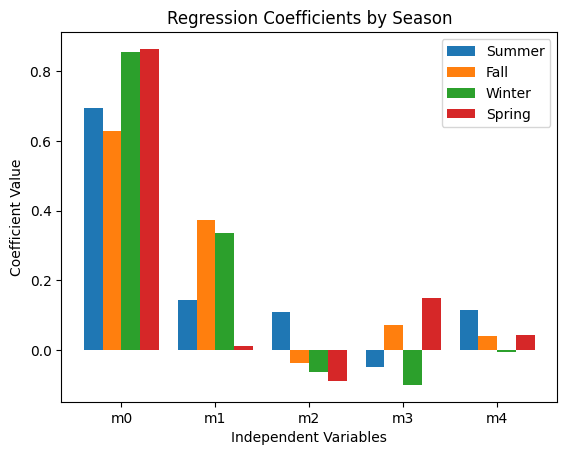

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 각 계절의 독립 변수 이름
independent_variables = ['m0', 'm1', 'm2', 'm3', 'm4']

# 계절별 회귀 계수
coefficients_summer = [0.69375709, 0.14283364, 0.10938227, -0.04888753, 0.11658289]
coefficients_fall = [0.62951579, 0.37375954, -0.03560792, 0.07312076, 0.04010905]
coefficients_winter = [0.85412137, 0.33517265, -0.06400474, -0.09982774, -0.00579211]
coefficients_spring = [0.86436922, 0.01227634, -0.08994772,  0.14834716,  0.042448]

# 계절 목록
seasons = ['Summer', 'Fall', 'Winter', 'Spring']

# 독립 변수 개수
num_variables = len(independent_variables)

# 막대 그래프의 x 좌표
x = np.arange(num_variables)

# 막대 그래프 폭
bar_width = 0.2

# 막대 그래프 생성
fig, ax = plt.subplots()

for i, season in enumerate(seasons):
    coefficients = [coefficients_summer, coefficients_fall, coefficients_winter, coefficients_spring][i]
    ax.bar(x + i * bar_width, coefficients, bar_width, label=season)

# x 축 레이블 설정
ax.set_xticks(x + bar_width * (len(seasons) - 1) / 2)
ax.set_xticklabels(independent_variables)

# 범례 추가
ax.legend()

# 그래프 제목 및 축 레이블 설정
plt.title('Regression Coefficients by Season')
plt.xlabel('Independent Variables')
plt.ylabel('Coefficient Value')

# 그래프 표시
plt.show()


In [13]:
import pandas as pd

# 계절별 회귀 계수 데이터 생성
season_coef = {
    'Independent Variable': ['m0', 'm1', 'm2', 'm3', 'm4'],
    'Summer Coefficients': [0.69375709, 0.14283364, 0.10938227, -0.04888753, 0.11658289],
    'Fall Coefficients': [0.62951579, 0.37375954, -0.03560792, 0.07312076, 0.04010905],
    'Winter Coefficients': [0.85412137, 0.33517265, -0.06400474, -0.09982774, -0.00579211],
    'Spring Coefficients': [0.86436922, 0.01227634, -0.08994772,  0.14834716,  0.042448]
}

# 데이터프레임 생성
sc = pd.DataFrame(season_coef)

# 데이터프레임을 엑셀 파일로 저장
sc.to_csv('seasonal_coefficients.csv', index=False)


In [14]:
sc

,Independent Variable,Summer Coefficients,Fall Coefficients,Winter Coefficients,Spring Coefficients
0,m0,0.693757,0.629516,0.854121,0.864369
1,m1,0.142834,0.373760,0.335173,0.012276
2,m2,0.109382,-0.035608,-0.064005,-0.089948
3,m3,-0.048888,0.073121,-0.099828,0.148347
4,m4,0.116583,0.040109,-0.005792,0.042448


In [15]:
import pandas as pd
import numpy as np

# 데이터를 불러옴
x_pred_ori = pd.read_csv("c:/Users/grace/Rdata/gen_forecasts/gen_fcst_17_2023-10-30.csv")  # 데이터 파일 경로에 맞게 수정


In [16]:
# 가중치 설정 (계절별 가중치를 해당 계절에 따라 가져오기)

summer_weights = [0.69375709, 0.14283364, 0.10938227, -0.04888753, 0.11658289]
fall_weights = [0.62951579, 0.37375954, -0.03560792, 0.07312076, 0.04010905]
winter_weights = [0.85412137, 0.33517265, -0.06400474, -0.09982774, -0.00579211]
spring_weights = [0.86436922, 0.01227634, -0.08994772,  0.14834716,  0.042448]

x_pred_ori['time'] = pd.to_datetime(x_pred_ori['time'])  # 날짜 및 시간 열을 날짜 형식으로 변환
x_pred_ori['month'] = x_pred_ori['time'].dt.month  # 계절 정보를 추출하기 위해 'month' 열을 생성

In [17]:
# 각 계절별로 데이터 분할
x_pred1 = x_pred_ori[(x_pred_ori['month'] >= 6) & (x_pred_ori['month'] <= 8)]
x_pred2 = x_pred_ori[(x_pred_ori['month'] >= 9) & (x_pred_ori['month'] <= 11)]
x_pred3 = x_pred_ori[(x_pred_ori['month'] >= 12) & (x_pred_ori['month'] <= 2)]
x_pred4 = x_pred_ori[(x_pred_ori['month'] >= 3) & (x_pred_ori['month'] <= 5)]

# 각 계절별로 모델별로 가중치를 적용하여 새로운 예측값 계산
def calculate_weighted_predictions(data, weights):
    data = data.copy()  # 데이터프레임 복사
    weighted_predictions = np.zeros(len(data))  # 시간대별 가중 예측값을 저장할 배열 초기화
    for i in range(5):
        col_name = 'model' + str(i+1)
        data[col_name + '_weighted'] = data[col_name] * weights[i]
        weighted_predictions += data[col_name + '_weighted']
    return weighted_predictions

weighted_predictions1 = calculate_weighted_predictions(x_pred1, summer_weights)
weighted_predictions2 = calculate_weighted_predictions(x_pred2, fall_weights)
weighted_predictions3 = calculate_weighted_predictions(x_pred3, winter_weights)
weighted_predictions4 = calculate_weighted_predictions(x_pred3, spring_weights)

# 새로운 예측값을 합치기
final_predictions = np.concatenate([weighted_predictions1, weighted_predictions2, weighted_predictions3, weighted_predictions4])

# 최종 예측값 출력
print(final_predictions)

[ 0.          0.          0.          0.          0.          0.
  1.2233626   6.87611848 25.70297206 47.63067566 64.5883804  73.46202962
 76.19606245 70.10700697 57.18220222 39.41234509 14.83475859  3.77493732
  1.33626128  0.          0.          0.          0.          0.        ]


In [18]:
import numpy as np

def testMSEnIncentive(pred):
    realGens1030 = np.array([0, 0, 0, 0, 0, 0,
                            0, 4, 20, 56,
                            65, 79, 81, 75,
                            62, 45, 22, 3, 0,
                            0, 0, 0, 0, 0])    
    
    rss = np.power(pred - realGens1030, 2)
    rss1 = rss[6:10]
    rss2 = rss[10:14]
    rss3 = rss[14:19]
    mse1 = sum(rss1/len(rss1))
    mse2 = sum(rss2/len(rss2))
    mse3 = sum(rss3/len(rss3))
    mse = [mse1,mse2,mse3]

    score_df = abs(pred - realGens1030)*100/99
    score = []
    for idx, i in enumerate(score_df):
        if i <=6:
            score.append(realGens1030[idx] * 4)
        elif (i <=8) & (i > 6):
            score.append(realGens1030[idx] * 3)
        else:
            score.append(0)
    score1 = score[6:10]
    score2 = score[10:14]
    score3 = score[14:19]
    final_score = [score1,score2,score3]

    return mse, final_score

In [19]:
testMSEnIncentive(final_predictions)

([28.084538457945307, 19.464435855394555, 21.63197386878067],
 [[0, 16, 80, 0], [260, 316, 324, 300], [248, 180, 66, 12, 0]])